## Basic Data Preparation

In [1]:
# import everything we need first
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [2]:
# read in data from the file
df = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
#make the random capitalisations in some of the columns consistent
df.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality',
                               'raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},
                               inplace=True)

## View Information of dataset

In [4]:
#dimensions of dataset
df.shape

(480, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 17 columns):
Gender                      480 non-null object
Nationality                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
RaisedHands                 480 non-null int64
VisitedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 67.5+ KB


## Data visualisations

### Visualisation of the categorical variables

There are 12 categorical variables in the dataset, namely {Gender, Nationality, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays}. 

We will first examine the two categorical variables of interest (Gender and StudentAbsenceDays), which seems to be highly linked with the dependent variable.

In [6]:
#For bargraphs and counts
def bar_chart(feature):
    low = df[df['Class']=='L'][feature].value_counts()
    mid = df[df['Class']=='M'][feature].value_counts()
    high = df[df['Class']=='H'][feature].value_counts()
    data = pd.DataFrame([low,mid,high])
    data.index = ['Low-Level','Middle-Level','High-Level']
    print(data)
    data.plot(kind='bar',stacked=True, figsize=(7,5))

#### Feature: StudentAbsenceDays

              Above-7  Under-7
Low-Level         116       11
Middle-Level       71      140
High-Level          4      138


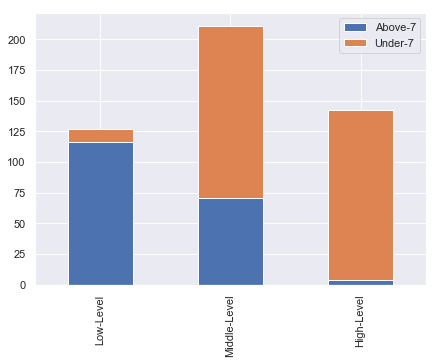

In [7]:
bar_chart('StudentAbsenceDays')

As expected, the lower the absence rate of the student, the better the student's performance. The strong linear relationship indicates the importance of this feature.

#### Features: Gender, Relation

                M   F
Low-Level     103  24
Middle-Level  135  76
High-Level     67  75


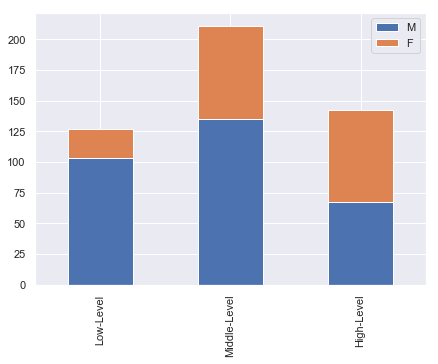

In [8]:
bar_chart('Gender')

From the count plots, it seems that girls generally performed better than boys as there is a higher proportion of females in the middle-level and high-level performance levels. 

We shall delve deeper to analyse if this linear relationship with the dependent variable cound be due to other associated features.

Visualising Gender with StudentAbsenceDays, Relation

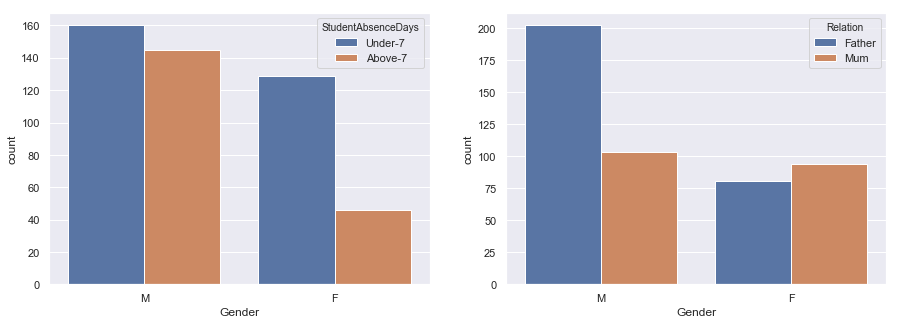

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',hue='StudentAbsenceDays',data=df,ax=ax[0])
sns.countplot(x='Gender',hue='Relation',data=df,ax=ax[1])

It is observed that the school attendance rate of girls is much higher than boys. This could explain why girls generally perform better than boys.

It appears that fathers are more interested in their child's education, especially in the case of boys. On the contrary, in the case of girls, mothers seem to show more interest in their studies.

Visualising Gender with the numeric features

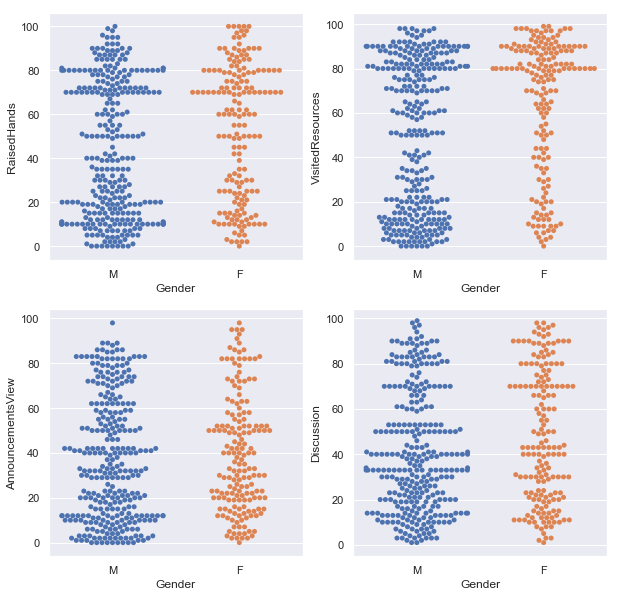

In [10]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.swarmplot(x='Gender', y='RaisedHands', data=df, ax=axarr[0,0])
sns.swarmplot(x='Gender', y='VisitedResources', data=df, ax=axarr[0,1])
sns.swarmplot(x='Gender', y='AnnouncementsView', data=df, ax=axarr[1,0])
sns.swarmplot(x='Gender', y='Discussion', data=df, ax=axarr[1,1])

From the plots, there is a greater proportion of girls having high count rate for visiting course content and raising hands. This could be why girls perform academically better than boys.

#### Features: Nationality, PlaceofBirth

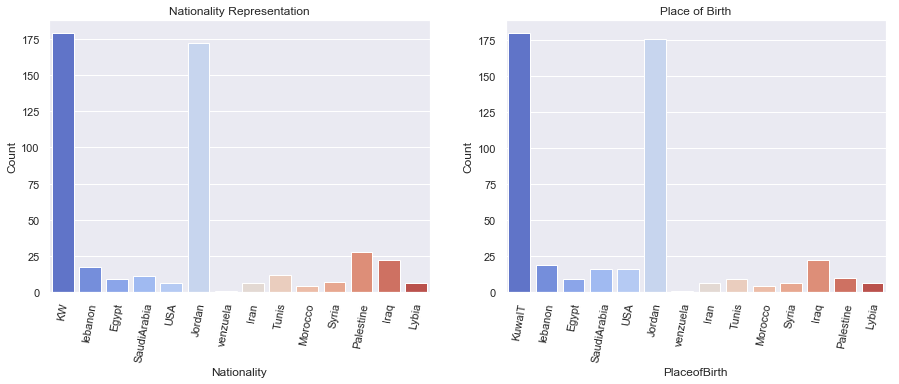

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
nat = sns.countplot(x='Nationality', data=df, palette='coolwarm', ax=ax[0])
nat.set(xlabel='Nationality', ylabel='Count', title='Nationality Representation')
birthplace = sns.countplot(x='PlaceofBirth', data=df, palette='coolwarm', ax=ax[1])
birthplace.set(xlabel='PlaceofBirth', ylabel='Count', title='Place of Birth')
plt.setp(nat.get_xticklabels(), rotation=80)
plt.setp(birthplace.get_xticklabels(), rotation=80)
plt.show()

Most of the students are from Kuwait or Jordan, as per the documentation. No interesting insights to be gained from these two features.

#### Features: ParentAnsweringSurvey, ParentschoolSatisfaction

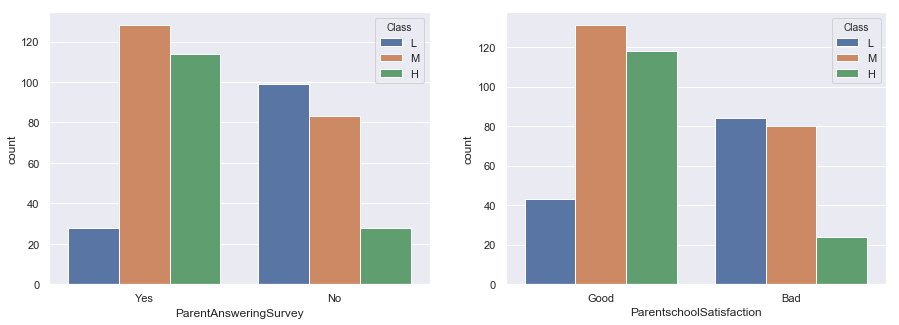

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='ParentAnsweringSurvey',hue='Class',hue_order=['L','M','H'],data=df,ax=ax[0])
sns.countplot(x='ParentschoolSatisfaction',hue='Class',hue_order=['L','M','H'],data=df,ax=ax[1])

From the first count plot, it can be deduced that a parent's active involvement in the school's activities could have a positive impact on his/her child's growth, which explains the higher classification of student performance. It is an indirect relationship with the dependent variable and this feature can be seen as less important. 

The second count plot yields rather similar results. It could be due to the high correlation between the two features. We shall further examine it.


In [ ]:
sns.countplot(x='ParentAnsweringSurvey',hue='ParentschoolSatisfaction',data=df)

It appears that a higher parent involvment leads to higher satisfaction with the school. One possible reason could be that parents are able to better understand their child's progress in school via communication means with the school, thus leading to a higher level of satisfaction.

#### Features: StageID, GradeID, SectionID

StageID- educational level of student (‘lowerlevel’,’MiddleSchool’,’HighSchool’)

Grade Levels- grade student belongs (‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

Section ID- classroom that student belongs (’A’,’B’,’C’)

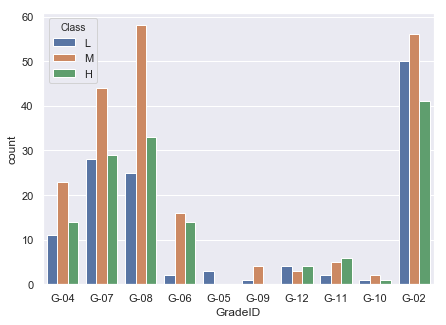

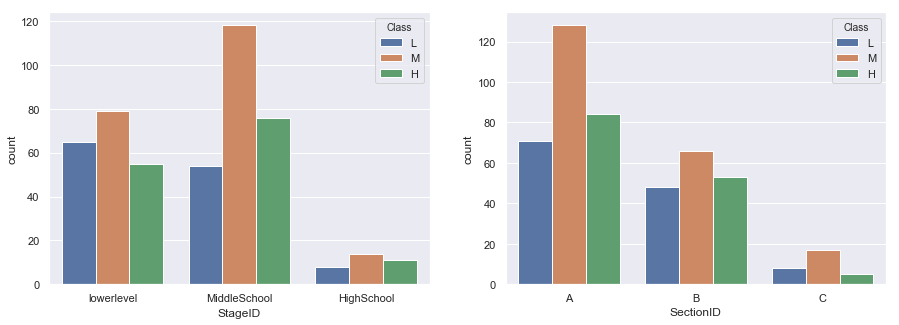

In [25]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x='GradeID',hue='Class',hue_order=['L','M','H'],data=df)
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='StageID',hue='Class',hue_order=['L','M','H'],data=df,ax=ax[0])
sns.countplot(x='SectionID',hue='Class',hue_order=['L','M','H'],data=df,ax=ax[1])

The school has a very high proportion of lower level and middle school students. In addition, it seems that classrooms A, B and C are utilised by middle school, lower level and high school students respectively. 

The frequency of the grade levels suggests a high correlation with the educational level of the students. GradeID can be re-categorised into three groups, {(G-02),(G-04 to G-08),(G-09 to G-12)}

#### Feature: Topic

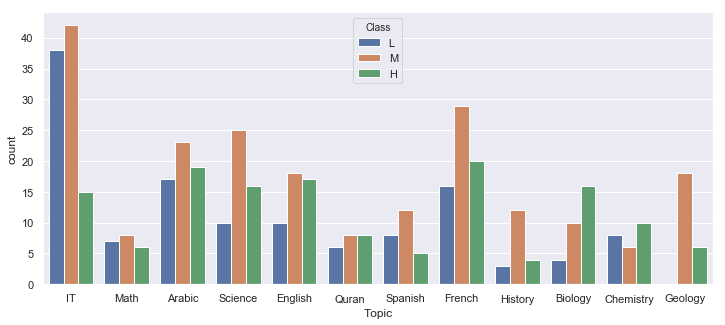

In [28]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='Topic',hue='Class',hue_order=['L','M','H'],data=df)

Students seem to fare badly for the technical subjects like IT.
Humanities subjects like history and geology is linked  with a higher performance classification. The above subjects can possibly be grouped into four categories, namely IT, Mathematics & Sciences, Languages, Humanities.

#### Feature: Semester

                F    S
Low-Level      77   50
Middle-Level  106  105
High-Level     62   80


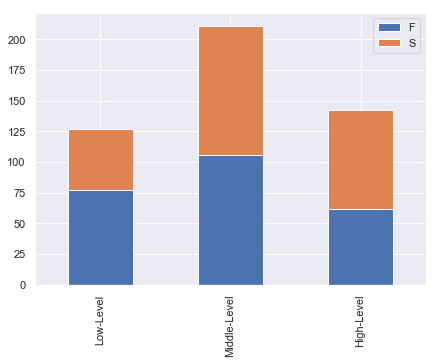

In [29]:
bar_chart('Semester')

The data suggests that students perform better in the second semester as shown by the higher proportion of students in the higher performance classification tier.

We shall delve deeper to examine whether it could be due to the difference in the type of subjects taken up in each semester. 

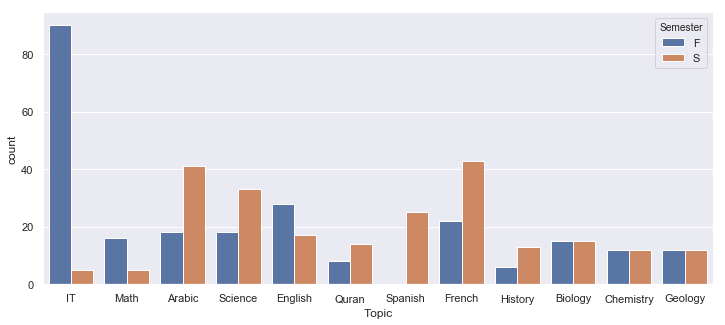

In [31]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='Topic',hue='Semester',data=df)

As shown in the plot above, it confirms our intuition that students fared better in second semester due to the much lower percentage of students taking up IT.

Next, we will examine the performance in the two semesters with the numeric variables to see if any additional valuable insights can be gained.

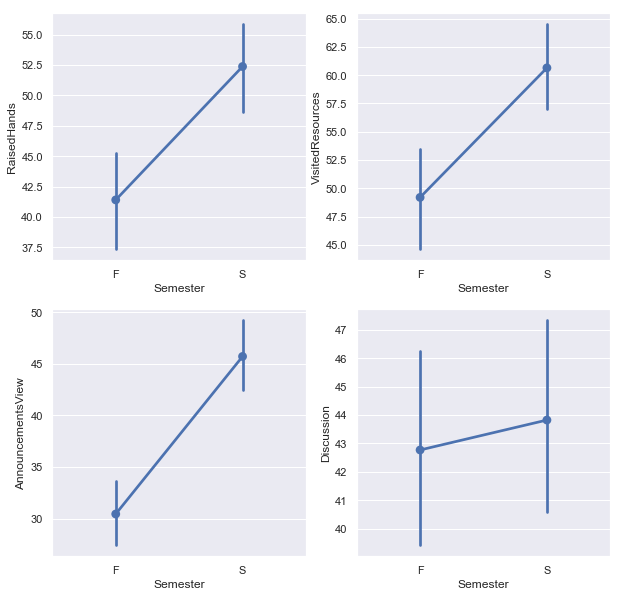

In [32]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.pointplot(x='Semester', y='RaisedHands', data=df, ax=axarr[0,0])
sns.pointplot(x='Semester', y='VisitedResources', data=df, ax=axarr[0,1])
sns.pointplot(x='Semester', y='AnnouncementsView', data=df, ax=axarr[1,0])
sns.pointplot(x='Semester', y='Discussion', data=df, ax=axarr[1,1])

We use make use of a pointplot to show how the relationship between two variables changes as well as the confidence interval.

In the second semester, we observed that students took more initiative in their studies in terms of participation in class, viewing of announcements and visiting of course content. This could probably be the key in achieving better results.

